# Assignment2 by Aubakirov Sultan

For this assignment you will use Fruits and Vegetables Image Recognition Dataset: 
https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

## Hardware used

I rented server with GPU: rtx6000Ada and CPU: AMD EPYC 9354

This work cost me around 2000KZT

<img src='rtx6000.jpg'>

## 1) Load and preprocess the given dataset

In [ ]:
!pip  install kaggle

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition
!unzip fruit-and-vegetable-image-recognition.zip

Installing all libraries, i've decide to use pytorch library

In [3]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision import utils
import os
from PIL import Image
from tqdm import tqdm
import time
import torch.nn.init as init

Constants:

In [4]:
image_size = 224
batch = 128
num_workers = 24
learning_rate = 0.0001
num_epochs = 50
num_classes = 36
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Now when data is installed it should be preprocessed

# 2) Data Augmentation

In [4]:
train_data = ImageFolder('train')
print(train_data.classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [67]:
for dir_name in ['test', 'train', 'validation']:
    original_data_path = dir_name
    augmented_data_path = f'augmented_{dir_name}'
    num_of_copies = 3

    augment_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
    ])

    dataset = ImageFolder(root=original_data_path)
    
    os.makedirs(augmented_data_path, exist_ok=True)

    for i, (img, label) in enumerate(dataset):
        class_name = dataset.classes[label]
        class_dir = os.path.join(augmented_data_path, class_name)
        os.makedirs(class_dir, exist_ok=True)
        print(os.path.join(class_dir, f'Image_{i + 1}.png'))
        img.save(os.path.join(class_dir, f'Image_{i + 1}.png'))
        for j in range(num_of_copies):
            augmented_img = augment_transform(img)
            
            save_path = os.path.join(class_dir, f'Image_{i + 1}_{j + 1}.png')

            augmented_img.save(save_path)
        print(class_name, " - image added succesfully")

print("Augmented images saved")


augmented_test\apple\Image_1.png
apple  - image added succesfully
augmented_test\apple\Image_2.png
apple  - image added succesfully
augmented_test\apple\Image_3.png
apple  - image added succesfully
augmented_test\apple\Image_4.png
apple  - image added succesfully
augmented_test\apple\Image_5.png
apple  - image added succesfully
augmented_test\apple\Image_6.png
apple  - image added succesfully
augmented_test\apple\Image_7.png
apple  - image added succesfully
augmented_test\apple\Image_8.png
apple  - image added succesfully
augmented_test\apple\Image_9.png
apple  - image added succesfully
augmented_test\apple\Image_10.png
apple  - image added succesfully
augmented_test\banana\Image_11.png
banana  - image added succesfully
augmented_test\banana\Image_12.png
banana  - image added succesfully
augmented_test\banana\Image_13.png
banana  - image added succesfully
augmented_test\banana\Image_14.png
banana  - image added succesfully
augmented_test\banana\Image_15.png
banana  - image added succes

C:\Users\test\AppData\Roaming\Python\Python38\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


apple  - image added succesfully
augmented_train\apple\Image_54.png
apple  - image added succesfully
augmented_train\apple\Image_55.png
apple  - image added succesfully
augmented_train\apple\Image_56.png
apple  - image added succesfully
augmented_train\apple\Image_57.png
apple  - image added succesfully
augmented_train\apple\Image_58.png
apple  - image added succesfully
augmented_train\apple\Image_59.png
apple  - image added succesfully
augmented_train\apple\Image_60.png
apple  - image added succesfully
augmented_train\apple\Image_61.png
apple  - image added succesfully
augmented_train\apple\Image_62.png
apple  - image added succesfully
augmented_train\apple\Image_63.png
apple  - image added succesfully
augmented_train\apple\Image_64.png
apple  - image added succesfully
augmented_train\apple\Image_65.png
apple  - image added succesfully
augmented_train\apple\Image_66.png
apple  - image added succesfully
augmented_train\apple\Image_67.png
apple  - image added succesfully
augmented_train

In [68]:
torch.cuda.is_available()


True

# 3) Data preprocessing

In [30]:
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # Изменение размера изображений на 224x224
    transforms.ToTensor(),  # Преобразование в тензор
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # AlexNet normalization
])


train_data = ImageFolder('augmented_train', transform=transform)
val_data = ImageFolder('validation', transform=transform)
test_data = ImageFolder('test', transform=transform)


train_loader = DataLoader(train_data, batch_size=30, shuffle=True)
val_loader = DataLoader(val_data, batch_size=30, shuffle=False)
test_loader = DataLoader(test_data, batch_size=30, shuffle=False)



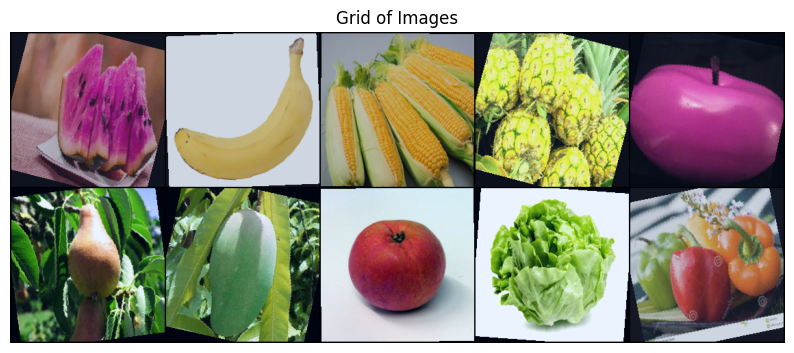

In [4]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
grid = utils.make_grid(images[:10], nrow=5, normalize=True)
plt.figure(figsize=(10, 10))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy()) 
plt.axis('off')
plt.title('Grid of Images')
plt.show()


# 4) Training of models

In [5]:
def train_model(model):
    criteria = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, weight_decay=1e-4)

    
    train_loss = []
    val_loss = []
    
    test_loss_min = np.inf
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        
        with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
            for batch_idx, (data, target) in enumerate(train_loader):
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                loss = criteria(output, target)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() * data.size(0)
                _, predicted = output.max(1)
                correct += predicted.eq(target).sum().item()
                
                pbar.update(1)
                pbar.set_postfix({'loss': loss.item()})
        
        train_loss /= len(train_loader.dataset)
        train_accuracy = 100. * correct / len(train_loader.dataset)

        test_loss = 0
        correct = 0
        model.eval()
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criteria(output, target)
                test_loss += loss.item() * data.size(0)
                _, predicted = output.max(1)
                correct += predicted.eq(target).sum().item()
        
        test_loss /= len(val_loader.dataset)
        test_accuracy = 100. * correct / len(val_loader.dataset)
        
        print(f'Epoch: {epoch + 1}, Training Loss: {train_loss:.6f}, Training Acc: {train_accuracy:.2f}%, Testing Loss: {test_loss:.6f}, Testing Acc: {test_accuracy:.2f}%')
        
        if test_loss < test_loss_min:
            print(f'Test loss decreased ({test_loss_min:.6f} --> {test_loss:.6f}). Saving model...')
            torch.save(model.state_dict(), model.__class__.__name__ + '_model_123.pt')
            test_loss_min = test_loss


        time_elapsed = time.time() - start_time
        estimated_time = (time_elapsed / (epoch + 1)) * (num_epochs - (epoch + 1))
        print(f'Time Elapsed: {int(time_elapsed // 60)}m {int(time_elapsed % 60)}s')
        print(f'Estimated Time Remaining: {int(estimated_time // 60)}m {int(estimated_time % 60)}s')

# Choosed architecture: AlexNet 

In [6]:
class AlexNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

![AlexNet](alex_design.png "Title")

Source: M. Hayashi-Nishino et al., “Identification of bacterial Drug-Resistant cells by the convolutional neural network in transmission electron microscope images,” Frontiers in Microbiology, vol. 13, Mar. 2022, doi: 10.3389/fmicb.2022.839718.

## AlexNET fine tuning on augmented data

In [7]:
class AlexNetPredtrained(nn.Module):
    def __init__(self, num_classes=1000):  # Обязательно укажите количество классов, если оно отличается
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),  # Эта строка оставлена без изменений
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),  # Эта строка оставлена без изменений
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),  # Измените с 256 на 192
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # Измените с 384 на 192
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),  # Параметры могут быть оставлены без изменений, если они совпадают
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)  # Убедитесь, что num_classes совпадает
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [ ]:
alexNet.to(device)

train_model(alexNet) # AlexNet_pretrained.pt

## Fully trained AlexNet

In [ ]:
alex_net = AlexNet()

alexNet.to(device)
train_model(alexNet) # AlexNet_trained.pt


## Leaky ReLU AlexNet

In [8]:
class AlexNetLeakyReLU(nn.Module):
    def __init__(self):
        super(AlexNetLeakyReLU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


model_leaky_relu = AlexNetLeakyReLU()

In [ ]:
model_leaky_relu.to(device)
train_model(model_leaky_relu) # AlexNetLeakyReLU_model.pt

## ELU AlexNet

In [10]:
class AlexNetELU(nn.Module):
    def __init__(self):
        super(AlexNetELU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ELU(alpha=1.0, inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ELU(alpha=1.0, inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ELU(alpha=1.0, inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ELU(alpha=1.0, inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ELU(alpha=1.0, inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ELU(alpha=1.0, inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ELU(alpha=1.0, inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


model_elu = AlexNetELU()

In [ ]:
model_elu.to(device)

train_model(model_elu) # AlexNetELU_model.pt

## Small random numbers AlexNet

In [11]:
class SmallRandomNet(AlexNet):
    def __init__(self):
        super(SmallRandomNet, self).__init__()
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                init.normal_(m.weight, mean=0.0, std=0.01)  # Small random initialization
                if m.bias is not None:
                    init.constant_(m.bias, 0)

In [ ]:
small = SmallRandomNet()

small.to(device)
train_model(small) # SmallRandomNet_model.pt

## Xavier AlexNet

In [12]:
class XavierNet(AlexNet):
    def __init__(self):
        super(XavierNet, self).__init__()
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)  # Xavier initialization
                if m.bias is not None:
                    init.constant_(m.bias, 0)

In [ ]:
xavier = XavierNet()

xavier.to(device)
train_model(xavier) # XavierNet_model.pt

## Kaiming AlexNet

In [13]:
class KaimingNet(AlexNet):
    def __init__(self):
        super(KaimingNet, self).__init__()
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')  # Kaiming/He initialization
                if m.bias is not None:
                    init.constant_(m.bias, 0)

In [ ]:
kaiming = KaimingNet()

kaiming.to(device)
train_model(kaiming) # KaimingNet_model.pt

## L1 AlexNet

In [10]:
def train_model(model):
    criteria = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

    
    train_loss = []
    val_loss = []
    
    test_loss_min = np.inf
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        
        with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
            for batch_idx, (data, target) in enumerate(train_loader):
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                l1_lambda = 1e-5
                l1_loss = sum(torch.sum(torch.abs(param)) for param in model.parameters())
                loss = criteria(output, target) + l1_lambda * l1_loss

                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() * data.size(0)
                _, predicted = output.max(1)
                correct += predicted.eq(target).sum().item()
                
                pbar.update(1)
                pbar.set_postfix({'loss': loss.item()})
        
        train_loss /= len(train_loader.dataset)
        train_accuracy = 100. * correct / len(train_loader.dataset)

        test_loss = 0
        correct = 0
        model.eval()
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criteria(output, target)
                test_loss += loss.item() * data.size(0)
                _, predicted = output.max(1)
                correct += predicted.eq(target).sum().item()
        
        test_loss /= len(val_loader.dataset)
        test_accuracy = 100. * correct / len(val_loader.dataset)
        
        print(f'Epoch: {epoch + 1}, Training Loss: {train_loss:.6f}, Training Acc: {train_accuracy:.2f}%, Testing Loss: {test_loss:.6f}, Testing Acc: {test_accuracy:.2f}%')
        
        if test_loss < test_loss_min:
            print(f'Test loss decreased ({test_loss_min:.6f} --> {test_loss:.6f}). Saving model...')
            torch.save(model.state_dict(), model.__class__.__name__ + '_model_123.pt')
            test_loss_min = test_loss


        time_elapsed = time.time() - start_time
        estimated_time = (time_elapsed / (epoch + 1)) * (num_epochs - (epoch + 1))
        print(f'Time Elapsed: {int(time_elapsed // 60)}m {int(time_elapsed % 60)}s')
        print(f'Estimated Time Remaining: {int(estimated_time // 60)}m {int(estimated_time % 60)}s')

In [ ]:
l1 = AlexNet()

l1.to(device)
train_model(l1) # L1.pt

## L2 AlexNet

In [ ]:
def train_model(model):
    criteria = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate, weight_decay=1e-4)

    
    train_loss = []
    val_loss = []
    
    test_loss_min = np.inf
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        
        with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
            for batch_idx, (data, target) in enumerate(train_loader):
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                loss = criteria(output, target)

                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() * data.size(0)
                _, predicted = output.max(1)
                correct += predicted.eq(target).sum().item()
                
                pbar.update(1)
                pbar.set_postfix({'loss': loss.item()})
        
        train_loss /= len(train_loader.dataset)
        train_accuracy = 100. * correct / len(train_loader.dataset)

        test_loss = 0
        correct = 0
        model.eval()
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criteria(output, target)
                test_loss += loss.item() * data.size(0)
                _, predicted = output.max(1)
                correct += predicted.eq(target).sum().item()
        
        test_loss /= len(val_loader.dataset)
        test_accuracy = 100. * correct / len(val_loader.dataset)
        
        print(f'Epoch: {epoch + 1}, Training Loss: {train_loss:.6f}, Training Acc: {train_accuracy:.2f}%, Testing Loss: {test_loss:.6f}, Testing Acc: {test_accuracy:.2f}%')
        
        if test_loss < test_loss_min:
            print(f'Test loss decreased ({test_loss_min:.6f} --> {test_loss:.6f}). Saving model...')
            torch.save(model.state_dict(), model.__class__.__name__ + '_model_123.pt')
            test_loss_min = test_loss


        time_elapsed = time.time() - start_time
        estimated_time = (time_elapsed / (epoch + 1)) * (num_epochs - (epoch + 1))
        print(f'Time Elapsed: {int(time_elapsed // 60)}m {int(time_elapsed % 60)}s')
        print(f'Estimated Time Remaining: {int(estimated_time // 60)}m {int(estimated_time % 60)}s')

In [ ]:
l2 = AlexNet()

l2.to(device)
train_model(l2) # L2.pt

## Batch normalization AlexNet

In [14]:
class BatchNormalizationNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.BatchNorm2d(96),  # Batch Normalization после Conv2d
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
batch = BatchNormalizationNet()
batch.to(device)
train_model(batch) # BatchNormalizationNet_model.pt

# Visualization

In [31]:
def load_model(model_path, model_class):
    print(model_path)
    model = model_class() if model_class != models.AlexNet else model_class(36)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

def test_model(model):
    correct = 0
    total = 0
    losses = []
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc=f'Testing {model.__class__.__name__}'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            losses.append(loss.item())
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    average_loss = np.mean(losses)
    return accuracy, average_loss


In [28]:
class_names = [models.AlexNet, AlexNet, AlexNetLeakyReLU, AlexNetELU, SmallRandomNet, XavierNet, KaimingNet, AlexNet, AlexNet, BatchNormalizationNet]
model_paths = [
    'AlexNet_pretrained.pt', 'AlexNet_trained.pt', 'AlexNetLeakyReLU_model.pt', 'AlexNetELU_model.pt',
    'SmallRandomNet_model.pt', 'XavierNet_model.pt', 'KaimingNet_model.pt',
    'L1.pt', 'L2.pt', 'BatchNormalizationNet_model.pt'
]


In [32]:
accuracies = []
losses = []

for model_path, model_class in zip(model_paths, class_names):
    model = load_model(model_path, model_class)
    accuracy, avg_loss = test_model(model)
    accuracies.append(accuracy)
    losses.append(avg_loss)
    print(f'{model_class.__name__} - Accuracy: {accuracy:.2f}%, Loss: {avg_loss:.4f}')

AlexNet_pretrained.pt


Testing AlexNet: 100%|██████████| 12/12 [00:27<00:00,  2.31s/it]


AlexNet - Accuracy: 80.63%, Loss: 0.8444
AlexNet_trained.pt


Testing AlexNet: 100%|██████████| 12/12 [00:26<00:00,  2.21s/it]


AlexNet - Accuracy: 55.84%, Loss: 2.8889
AlexNetLeakyReLU_model.pt


Testing AlexNetLeakyReLU: 100%|██████████| 12/12 [00:26<00:00,  2.24s/it]


AlexNetLeakyReLU - Accuracy: 90.31%, Loss: 0.4102
AlexNetELU_model.pt


Testing AlexNetELU: 100%|██████████| 12/12 [00:26<00:00,  2.20s/it]


AlexNetELU - Accuracy: 93.45%, Loss: 0.3399
SmallRandomNet_model.pt


Testing SmallRandomNet: 100%|██████████| 12/12 [00:27<00:00,  2.29s/it]


SmallRandomNet - Accuracy: 93.16%, Loss: 0.3579
XavierNet_model.pt


Testing XavierNet: 100%|██████████| 12/12 [00:26<00:00,  2.21s/it]


XavierNet - Accuracy: 96.58%, Loss: 0.3086
KaimingNet_model.pt


Testing KaimingNet: 100%|██████████| 12/12 [00:26<00:00,  2.18s/it]


KaimingNet - Accuracy: 89.74%, Loss: 0.4134
L1.pt


Testing AlexNet: 100%|██████████| 12/12 [00:26<00:00,  2.20s/it]


AlexNet - Accuracy: 52.42%, Loss: 3.0758
L2.pt


Testing AlexNet: 100%|██████████| 12/12 [00:26<00:00,  2.21s/it]


AlexNet - Accuracy: 66.38%, Loss: 1.0696
BatchNormalizationNet_model.pt


Testing BatchNormalizationNet: 100%|██████████| 12/12 [00:26<00:00,  2.18s/it]

BatchNormalizationNet - Accuracy: 72.65%, Loss: 1.5457


In [34]:
list(map(lambda x: x.__name__, class_names)), accuracies

(['AlexNet',
  'AlexNet',
  'AlexNetLeakyReLU',
  'AlexNetELU',
  'SmallRandomNet',
  'XavierNet',
  'KaimingNet',
  'AlexNet',
  'AlexNet',
  'BatchNormalizationNet'],
 [80.62678062678063,
  55.84045584045584,
  90.31339031339031,
  93.44729344729345,
  93.16239316239316,
  96.58119658119658,
  89.74358974358974,
  52.421652421652425,
  66.38176638176638,
  72.64957264957265])

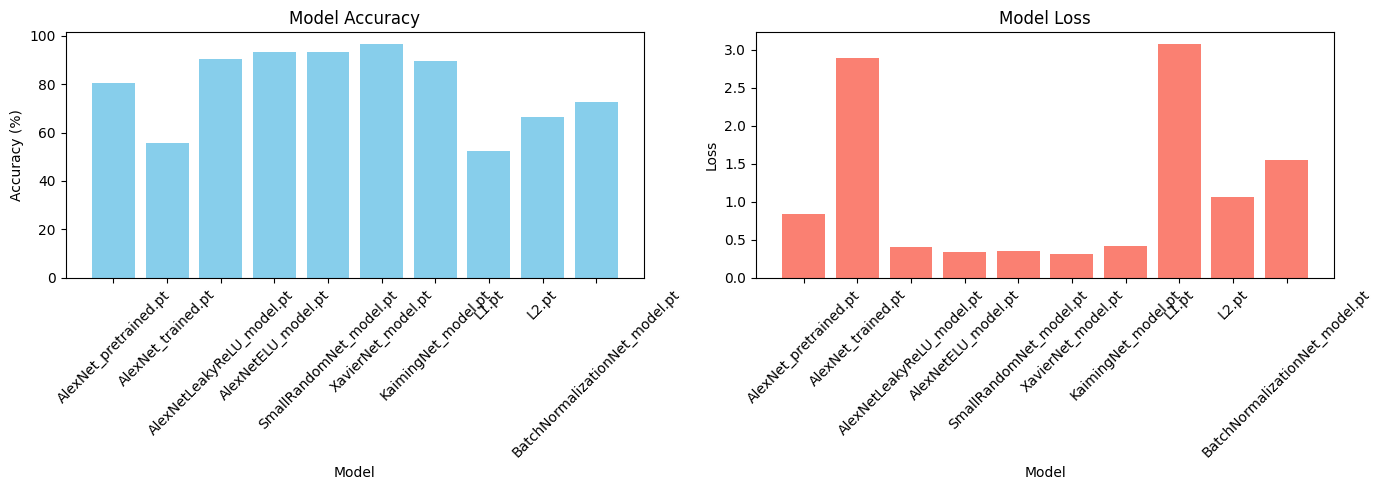

In [38]:

# Построение графиков точности и потерь
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)
plt.bar(model_paths, accuracies, color='skyblue')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)

# График потерь
plt.subplot(1, 2, 2)
plt.bar(model_paths, losses, color='salmon')
plt.title('Model Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (55,)

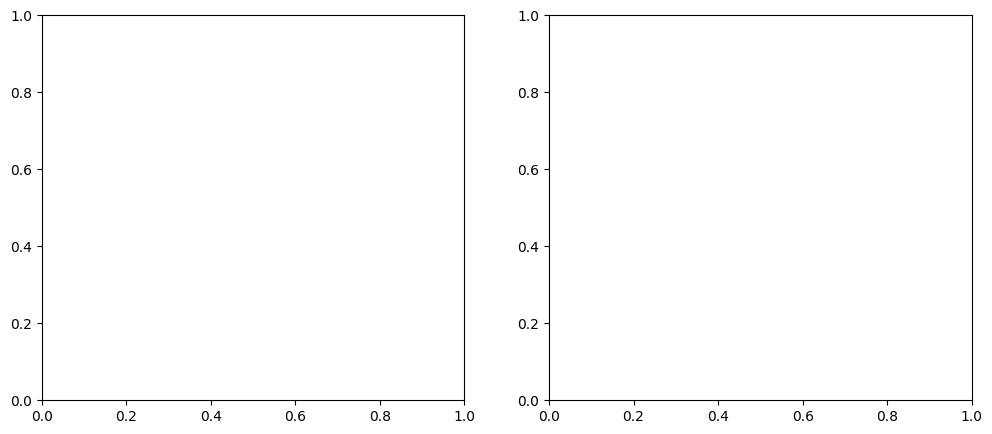

In [37]:
epochs = list(range(1, 51))  # допустим, 20 эпох
loss = [
    3.365971, 3.041106, 2.855312, 2.709120, 2.687486,
    2.607066, 2.496801, 2.416221, 2.346220, 2.232196,
    2.140115, 2.118686, 1.907182, 1.808385, 1.759748,
    1.716443, 1.576840, 1.613277, 1.518117, 1.455793,
    1.329324, 1.311243, 1.307299, 1.294480, 1.237122,
    1.215106, 1.176217, 1.150115, 1.137471, 1.122154,
    1.083892, 1.055505, 1.016074, 1.004843, 0.988930,
    0.974087, 0.939506, 0.917951, 0.897701, 0.876800,
    0.858769, 0.839180, 0.823751, 0.812239, 0.797117,
    0.788679, 0.774463, 0.765379, 0.755706, 0.749879,
    0.733139, 0.724467, 0.711242, 0.703580, 0.695707
]

accuracy = [
    6.55, 13.11, 11.40, 19.37, 22.22,
    21.94, 27.92, 28.49, 32.48, 33.90,
    36.47, 41.88, 45.58, 46.72, 51.57,
    48.15, 54.99, 58.69, 57.26, 58.69,
    65.53, 62.68, 63.55, 64.12, 64.96,
    65.78, 66.40, 67.01, 67.90, 68.21,
    68.94, 69.73, 70.45, 71.34, 71.88,
    72.10, 72.39, 73.27, 73.54, 74.31,
    74.90, 75.28, 76.14, 76.41, 76.72,
    77.10, 77.39, 78.01, 78.33, 78.90,
    79.21, 79.56, 79.82, 80.21, 80.59
]

# Создаем фигуру и подграфики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Первый подграфик - точность
ax1.plot(epochs, accuracy, marker='o', color='b', label='Accuracy')
ax1.set_title('Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Второй подграфик - ошибка
ax2.plot(epochs, loss, marker='o', color='r', label='Loss')
ax2.set_title('Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Отображаем графики
plt.tight_layout()
plt.show()
